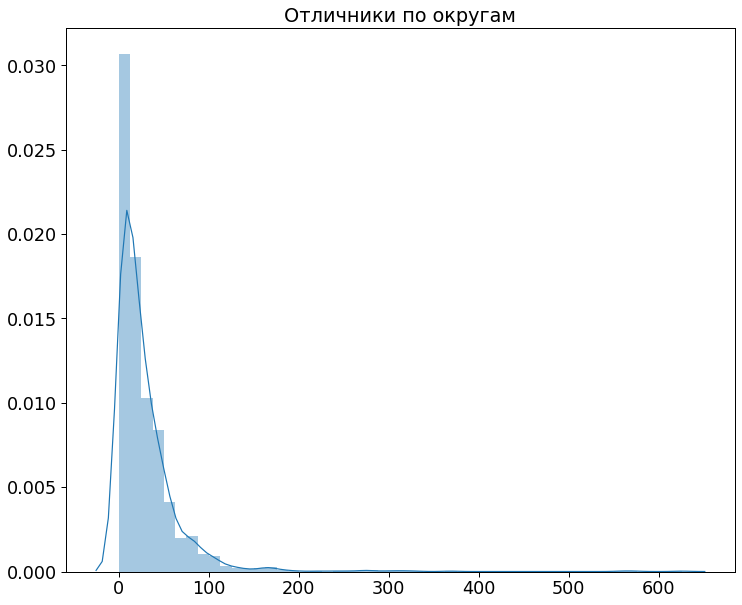

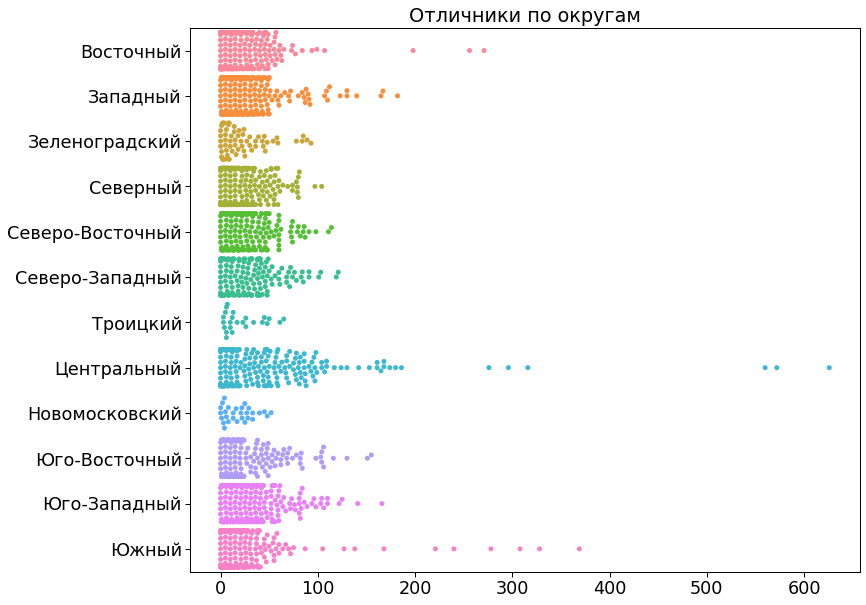

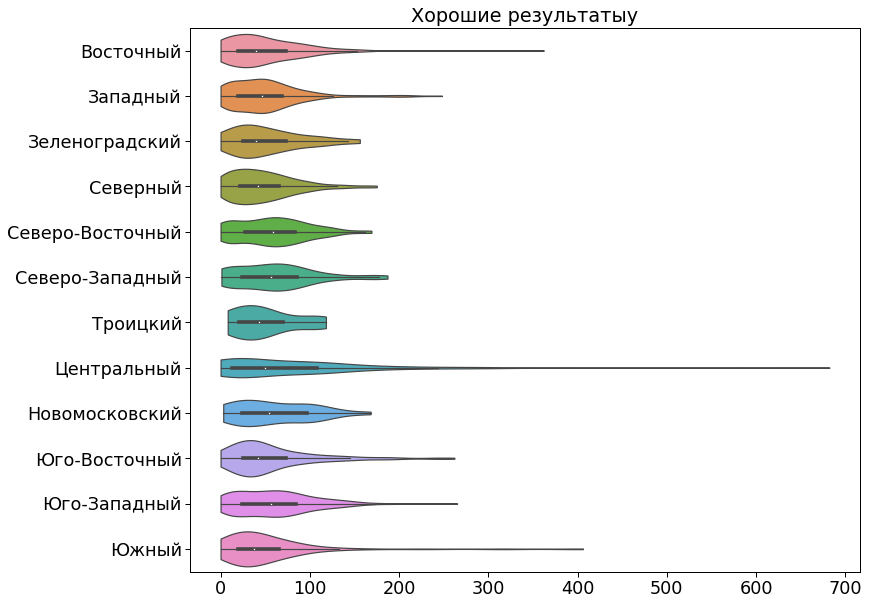

In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#задать размеры холста без непосредственно его создания
from matplotlib import rcParams 

#увеличение шрифта по умолчанию
rcParams['figure.figsize'] = 12,10 
sns.set_context("paper", font_scale=2)

data = pd.read_csv("http://digo.ee/data-9722.utf.csv", delimiter=";")

# для округа Москвы сраязу оставим только первое слово
data["AdmArea"] = data["AdmArea"].apply(lambda x:x.split(" ")[0])

#построение базового графика по всем результатам
sns.distplot(data["PASSES_OVER_220"]).set(xlabel='', ylabel='', title='Отличники по округам')

plt.show()

#График улей по округам Москвы
sns.swarmplot(x="PASSES_OVER_220", y="AdmArea", data=data).set(xlabel='', ylabel='', title='Отличники по округам')
plt.show()

#График скрипка по округам Москвы
sns.violinplot(x="PASSER_UNDER_160", y="AdmArea", data=data, cut=0)
plt.xlabel('')
plt.ylabel('')
plt.title('Хорошие результатыу')
plt.show()

#print (data.head())

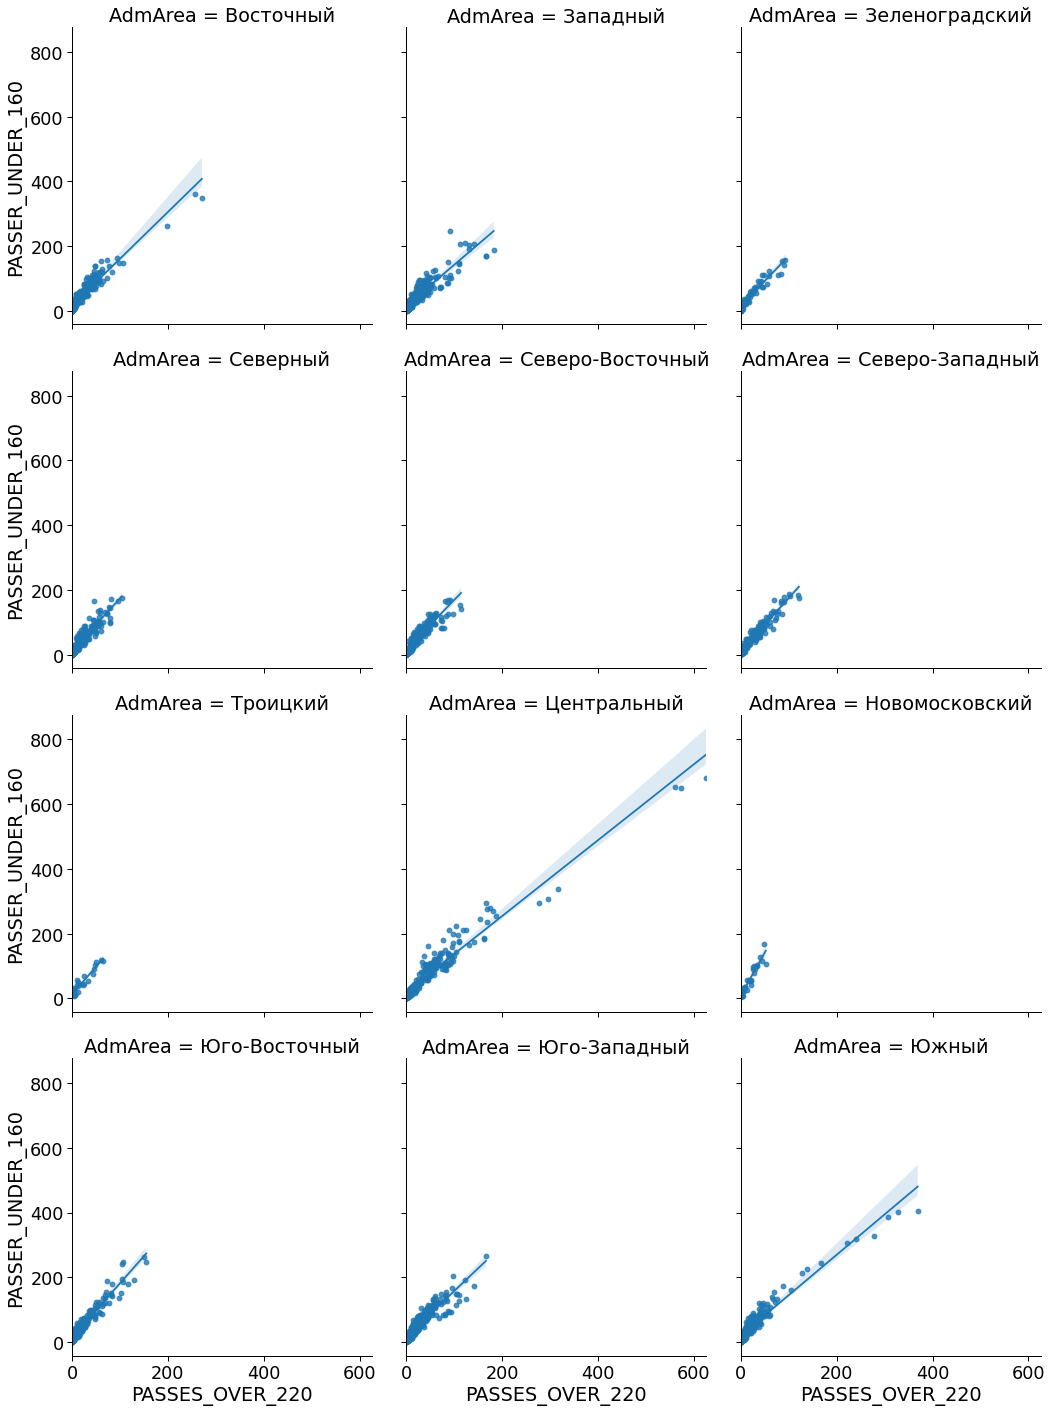

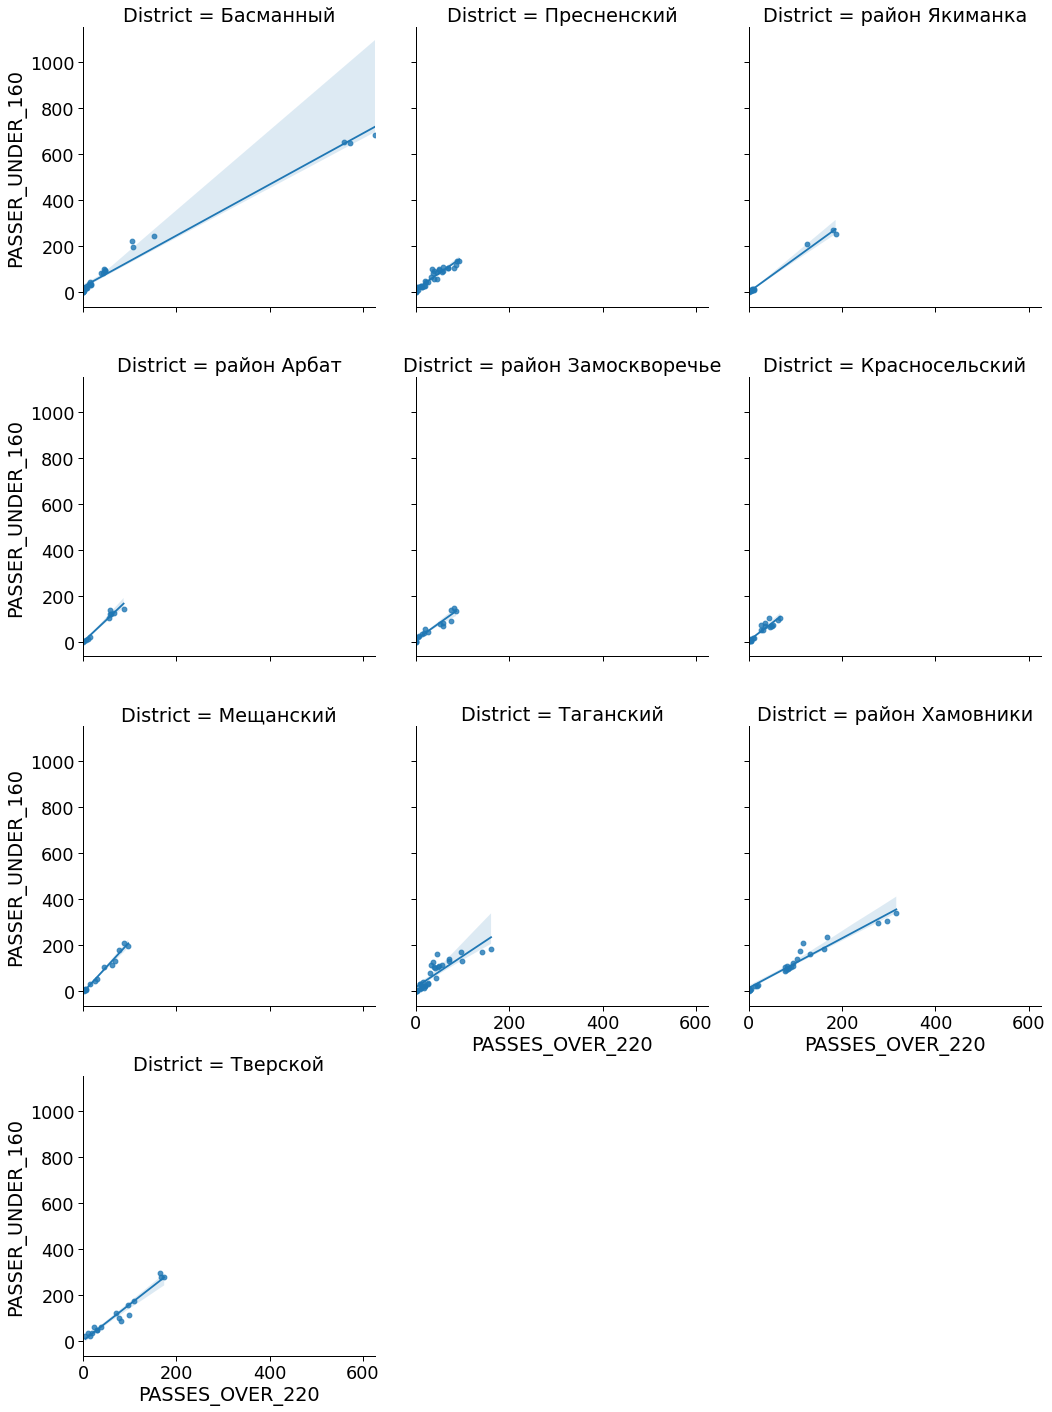

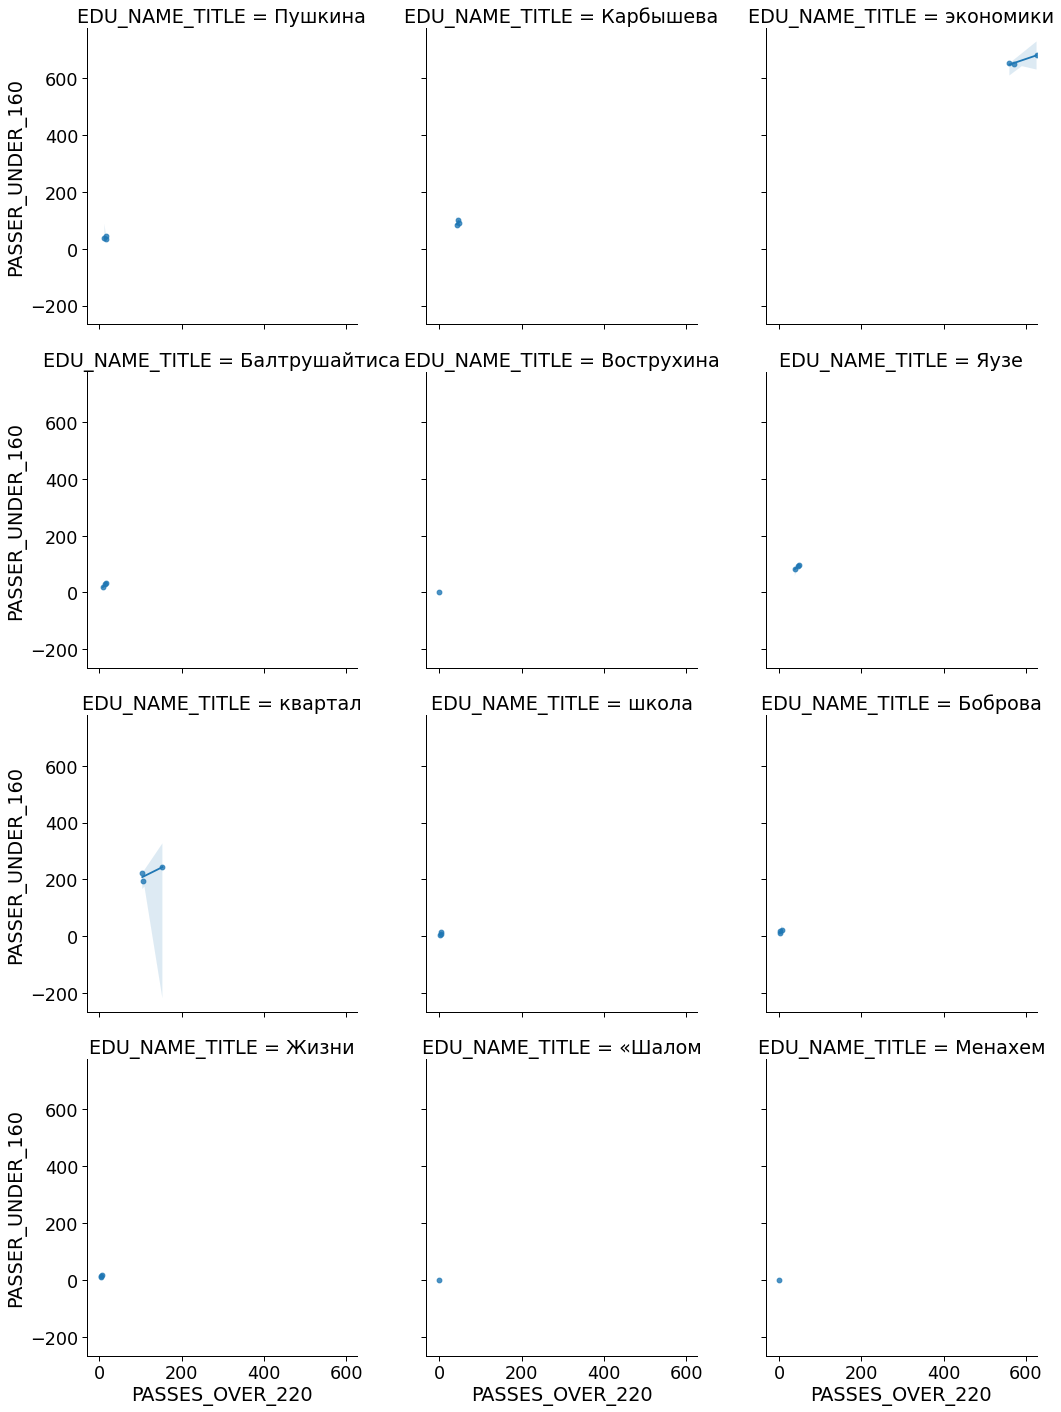

EDU_NAME_TITLE
экономики               Федеральное государственное автономное образовательное учреждение высшего «Национальный исследовательский университет «Высшая школа экономики». лицей «Национального исследовательского университета «Высшая школа экономики»
экономики                                                                Федеральное государственное автономное образовательное учреждение высшего профессионального образования «Национальный исследовательский университет «Высшая школа экономики»
экономики    Федеральное государственное автономное образовательное учреждение высшего образования «Национальный исследовательский университет» Высшая школа экономики». лицей Национального исследовательского университета» Высшая школа экономики»
Name: EDU_NAME, dtype: object


In [25]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

#размеры холста 12х12
rcParams['figure.figsize'] = 12,12
#увеличенный размер шрифта
sns.set_context('paper', font_scale=2)

#оставим от округа первое слово, уберём район, а для школы оставим последнее слово
data = pd.read_csv("http://digo.ee/data-9722.utf.csv", delimiter=";")
data["AdmArea"] = data["AdmArea"].apply(lambda x:x.split(" ")[0])
data["District"] = data["District"].str.replace(" район", "")
data["EDU_NAME_TITLE"] = data["EDU_NAME"].apply(lambda x:x.split(" ")[-1].replace("»",""))

#построение серии графиков разбросов
sns.lmplot(x="PASSES_OVER_220", y="PASSER_UNDER_160", data=data, col="AdmArea", col_wrap=3, truncate=True)

#построение серии уточняющих графиков по району
data1 = data.set_index("AdmArea").loc["Центральный"]
sns.lmplot(x="PASSES_OVER_220", y="PASSER_UNDER_160", data=data1, col="District", col_wrap=3, truncate=True)
plt.show()

#построение графиков по Басманному району
data2 = data1.set_index("District").loc["Басманный"]
sns.lmplot(x="PASSES_OVER_220", y="PASSER_UNDER_160", data=data2, col="EDU_NAME_TITLE", col_wrap=3, truncate=True)
plt.show()

#нахождение полного названия школы из исходных данных
pd.options.display.max_colwidth = 1000
print (data2.set_index('EDU_NAME_TITLE').loc["экономики"]["EDU_NAME"])

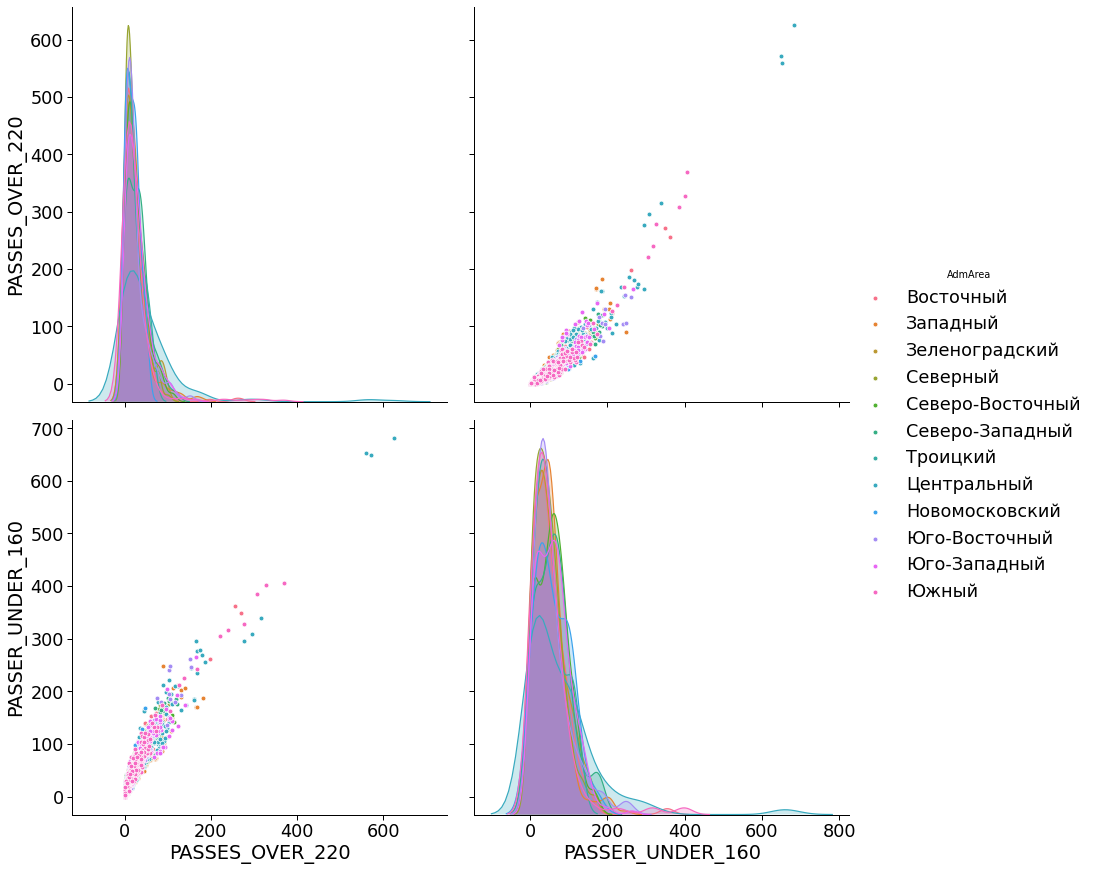

/Users/dmitrigornakov/Documents/jupyter/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


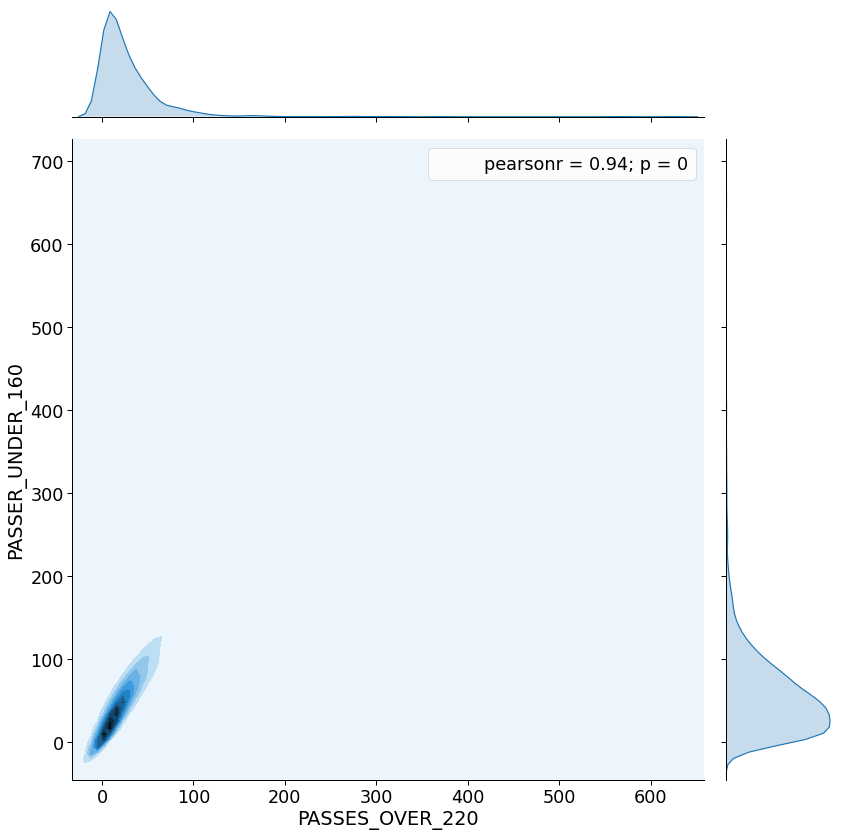

0.94


In [6]:
#Кореляционные диаграммы

%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

sns.set_context("paper", font_scale=2)
data = pd.read_csv("http://digo.ee/data-9722.utf.csv", delimiter=";")
data["AdmArea"] = data["AdmArea"].apply(lambda x:x.split(" ")[0])
data1 = pd.DataFrame(data, columns=["PASSES_OVER_220", "PASSER_UNDER_160", "AdmArea"])

#построение парного графика разбросов по цифровым данным
#характерная линейная взаимосвязь - Кореляция (хорошие и отличные результаты)
sns.pairplot(data1, hue="AdmArea", height=6)
plt.show()
sns.jointplot("PASSES_OVER_220", "PASSER_UNDER_160", data, height=12, kind="kde").annotate(stats.pearsonr)
plt.show()
print (round(stats.pearsonr(data["PASSES_OVER_220"], data["PASSER_UNDER_160"])[0], 2))